In [1]:
import pandas as pd

In [2]:

datas = pd.read_csv('hello_fresh - Sheetmeal.csv')
datas
datas = datas.rename({'Date & time':'date'}, axis = 1)
# datas = datas.drop(['Date & time'], axis=1)
datas['date'] = pd.to_datetime(datas['date']).dt.strftime("%y-%m-%d")

In [7]:

def get_tcpa_range(data):

  initial = []
  final = []
  dates = []
  campaigns = []
  ad_group = []
  # data["Changes"]
  level = []
  # data["Date & time"]
  # print(type(data["Changes"]))
  for i in range(len(data["Changes"])):
    if "Target CPA" in data["Changes"][i]:
      # print(i)
      # print(data["Changes"][i])
      # print(data["Date & time"][i])
      dates.append(data["date"][i])
      campaigns.append(data["Campaign"][i])
      ad_group.append(data["Ad group"][i])
      

    
      if "Campaign" in data["Changes"][i]:
        level.append("campaign")

      else:
        level.append("ad group")
    
      # print((i))
      k = data["Changes"][i].split(" ")
      # print(i)
    
      for j in k:
        if "to" == j:
          initial.append(float(k[k.index(j)-1].replace("$","")))
          final.append(float(k[k.index(j)+1].replace("$","")))
        
    
  df= pd.DataFrame()
  df["date"]= dates
  df["initial"] = initial
  df["final"] = final
  df["level"] = level
  df["Campaign name"]= campaigns
  df["Ad group name"] = ad_group
  
  return df 

In [8]:
tcpa = get_tcpa_range(datas)
df= tcpa 
# df
tcpa

,date,initial,final,level,Campaign name,Ad group name
0,22-07-05,120.0,126.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
1,22-07-04,111.0,120.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
2,22-06-28,99.0,105.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
3,22-06-03,107.0,111.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
4,22-06-03,99.0,107.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
5,22-05-31,95.0,99.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
6,22-05-17,105.0,95.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
7,22-05-17,95.0,105.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
8,22-05-17,93.0,95.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
9,22-05-14,80.0,93.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN


In [11]:
data = pd.read_csv('TCPA strategy - Hellofresh-metric.csv')
data.rename(columns={'Date':'date','Ad group ID':'ad_group_id','Campaign ID':'campaign_id','Cost':'cost','Keyword ID':'keyword_id','Cost per conversion':'cost_per_conversion','Conversions':'conversions','Clicks':'clicks','Impressions':'impressions','Impression share':'impression_share','Keyword':'keyword'},inplace=True)


data_meals = data[data["Campaign name"]== "US-S[01]: Prospecting | Brand | Meals - Exact"].copy()
data_meals['date'] = pd.to_datetime(data_meals['date']).dt.strftime("%y-%m-%d")
# data_meals
# data_meals["clicks"]

In [12]:

# tcpa
tcpa = tcpa[tcpa["level"]== "ad group"]
tcpa


,date,initial,final,level,Campaign name,Ad group name
0,22-07-05,120.0,126.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
1,22-07-04,111.0,120.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
3,22-06-03,107.0,111.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
4,22-06-03,99.0,107.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
11,22-04-30,93.0,99.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
15,22-04-20,85.0,93.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
16,22-04-18,83.0,85.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
17,22-04-17,75.0,83.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
18,22-04-17,55.0,75.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
19,22-04-16,51.0,55.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals


#  marging 

In [13]:

data1 = pd.merge(data_meals,tcpa,on=['date'], how = "left")
data1["final"].fillna(method ="ffill", inplace = True)
# df.fillna(method='ffill')

# data["ad_group_id"].unique()
# print(data.groupby(["date"])["initial"])
# data[data["date"]>="22-01-8"][["date","final"]].head(60)
# data[data["final"]==50]["date"]

In [15]:
count = 0
for i in tcpa['final']:
  count = count+1
  # print(i)
  data = data1[data1["final"] == i]
  # print(data)
  #find top ad_groups basis spends
  analysis = data.groupby(['ad_group_id'])['cost'].sum().reset_index().sort_values('cost',ascending=False,ignore_index = True)
  analysis["Cost_cumsum"] = analysis["cost"].cumsum()
  analysis["cost_share"] = analysis["cost"].cumsum()/analysis['cost'].sum()


  #take top 10 adgroups
  top_adgroups = analysis[:10]['ad_group_id'].values
  # print(top_adgroups)


  df = data[data['ad_group_id'].isin(top_adgroups)].copy()

  analysis = df.groupby('ad_group_id')[['final','cost','conversions','impression_share',"clicks"]].agg({'final':'mean','cost':'sum','conversions':'sum','impression_share':'mean',"clicks":"sum",})
  analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']
  if count == 1:
    new = analysis
  new = pd.concat([new, analysis])
new = new.iloc[1:,:]
print(new)


              final       cost  conversions  impression_share  clicks  \
ad_group_id                                                             
104499295183  126.0    5385.56        36.49          0.933043    1216   
104499295183  120.0    3955.12        32.65          0.920435     963   
104499295183  111.0    5948.95        61.80          0.913750    1070   
104499295183  107.0  189049.98      1581.78          0.914721   39274   
104499295183   99.0  208311.00      1974.66          0.925612   42110   
104499295183   93.0   59201.12       550.78          0.901019   12759   
104499295183   85.0   10688.50       127.92          0.898889    2422   
104499295183   83.0    2943.72        39.76          0.882273     838   
104499295183   75.0    2943.72        39.76          0.882273     838   
104499295183   55.0    1860.16        30.21          0.758750     707   
104499295183   51.0    5368.28       115.85          0.816719    2241   

              cost_per_conv  
ad_group_id         

In [18]:
 new["cost_per_conv_delta"] = new["cost_per_conv"].diff() 
 new["clicks_delta"] = new["clicks"].diff()
 new["impression_share_delta"] = new["impression_share"].diff()
new["conversions_delta"] = new["conversions"].diff()
new

,final,cost,conversions,impression_share,clicks,cost_per_conv,cost_per_conv_delta,clicks_delta,impression_share_delta,conversions_delta
ad_group_id,,,,,,,,,,
104499295183,126.0,5385.56,36.49,0.933043,1216,147.590025,NaN,NaN,NaN,NaN
104499295183,120.0,3955.12,32.65,0.920435,963,121.136907,-26.453118,-253.0,-0.012609,-3.84
104499295183,111.0,5948.95,61.80,0.913750,1070,96.261327,-24.875580,107.0,-0.006685,29.15
104499295183,107.0,189049.98,1581.78,0.914721,39274,119.517240,23.255913,38204.0,0.000971,1519.98
104499295183,99.0,208311.00,1974.66,0.925612,42110,105.492085,-14.025155,2836.0,0.010891,392.88
104499295183,93.0,59201.12,550.78,0.901019,12759,107.485965,1.993881,-29351.0,-0.024594,-1423.88
104499295183,85.0,10688.50,127.92,0.898889,2422,83.556129,-23.929837,-10337.0,-0.002130,-422.86
104499295183,83.0,2943.72,39.76,0.882273,838,74.037223,-9.518905,-1584.0,-0.016616,-88.16
104499295183,75.0,2943.72,39.76,0.882273,838,74.037223,0.000000,0.0,0.000000,0.00


<AxesSubplot:xlabel='final'>

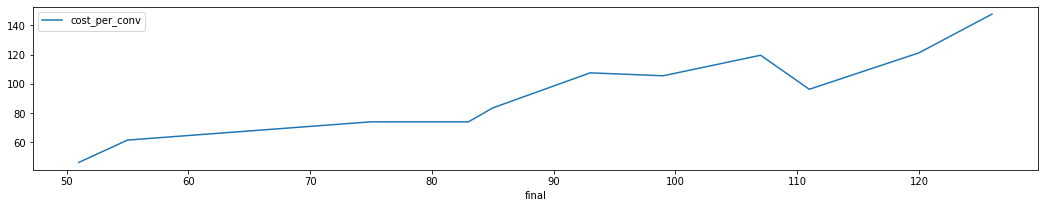

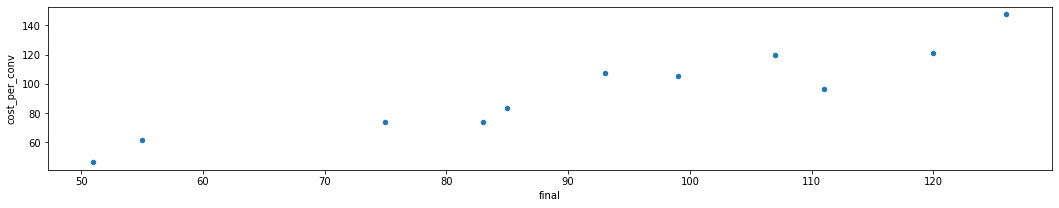

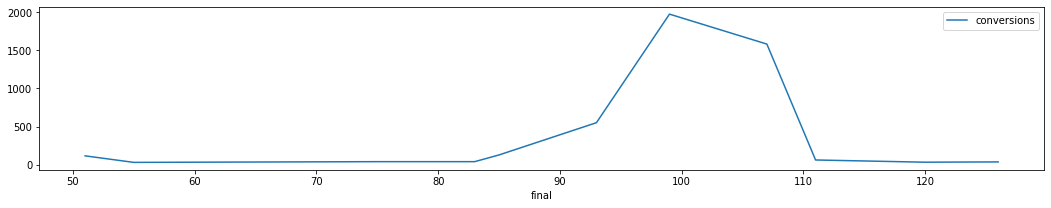

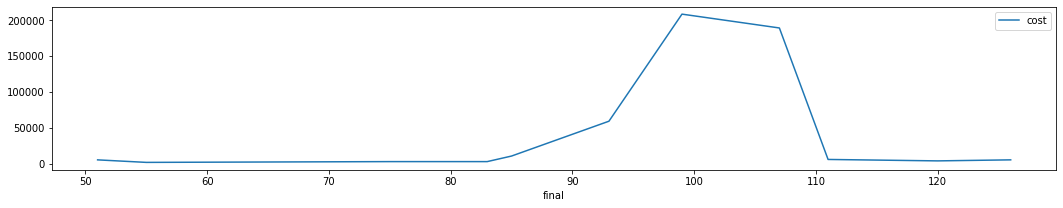

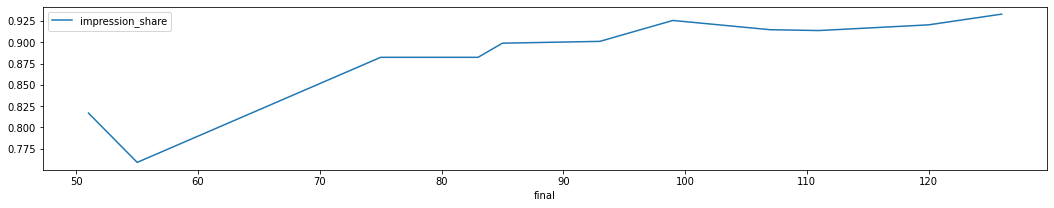

In [58]:
#grpah plot for this 

new.plot(x='final',y='cost_per_conv',figsize=(18,3))
new.plot(x='final',y='cost_per_conv',figsize=(18,3), kind="scatter")

new.plot(x='final',y='conversions',figsize=(18,3))
new.plot(x='final',y='cost',figsize=(18,3))
new.plot(x='final',y='impression_share',figsize=(18,3))

<AxesSubplot:xlabel='impression_share'>

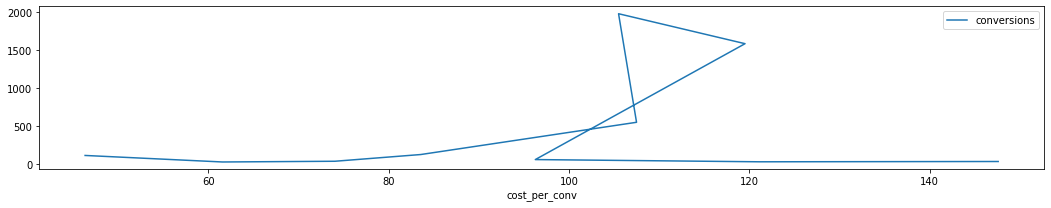

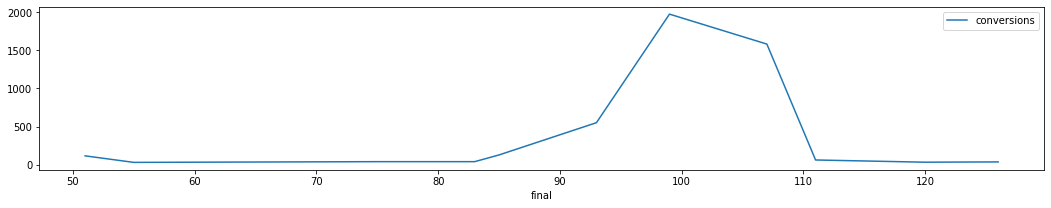

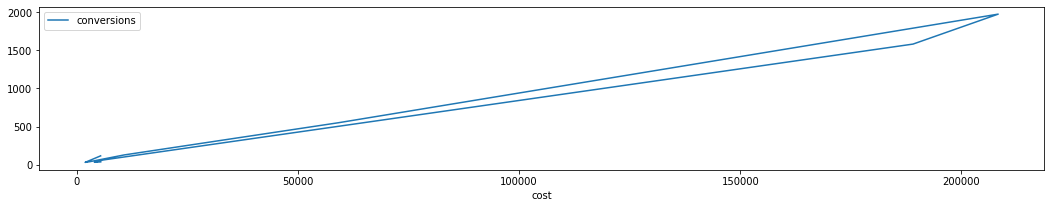

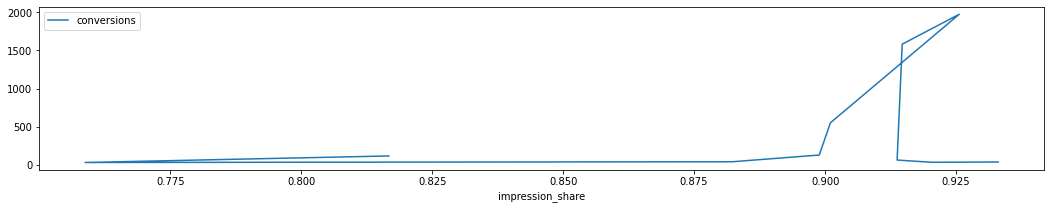

In [21]:
new.plot(x='cost_per_conv',y='conversions',figsize=(18,3))

new.plot(x='final',y='conversions',figsize=(18,3))
new.plot(x='cost',y='conversions',figsize=(18,3))
new.plot(x='impression_share',y='conversions',figsize=(18,3))

<AxesSubplot:xlabel='conversions'>

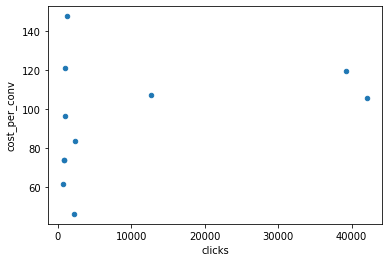

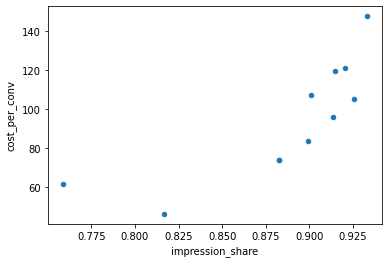

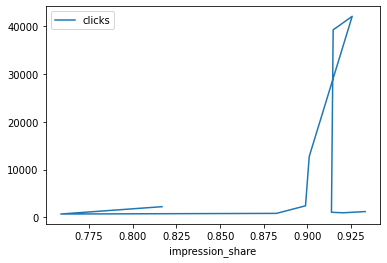

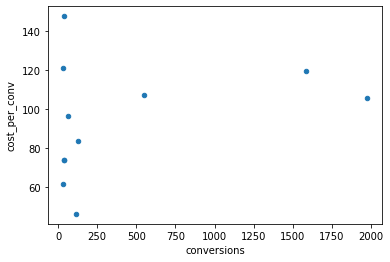

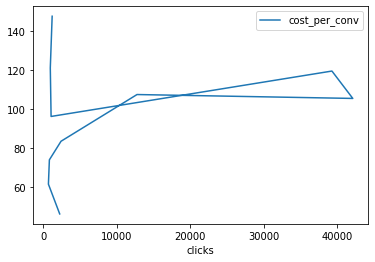

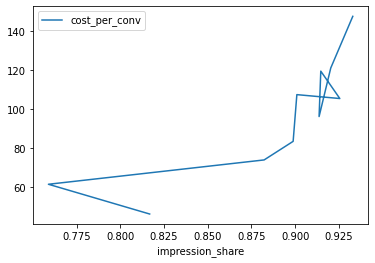

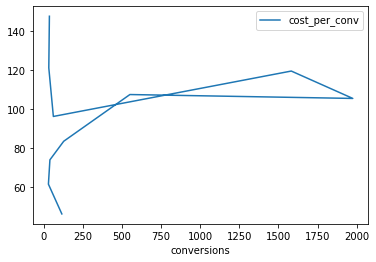

In [22]:
new.plot(y="cost_per_conv", x="clicks", kind = "scatter")
new.plot(y="cost_per_conv", x="impression_share", kind = "scatter")
new.plot(x="impression_share", y="clicks", kind = "line")
new.plot(y="cost_per_conv", x="conversions", kind = "scatter")
new.plot(y="cost_per_conv", x="clicks", kind = "line")
new.plot(y="cost_per_conv", x="impression_share", kind = "line")
new.plot(y="cost_per_conv", x="conversions", kind = "line")

<AxesSubplot:xlabel='cost_per_conv_delta'>

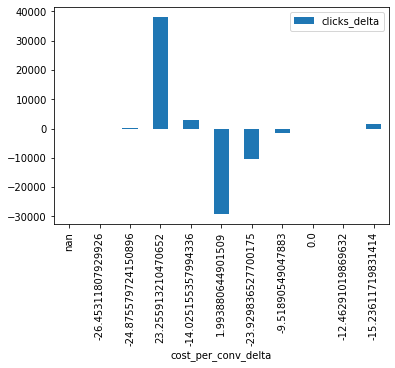

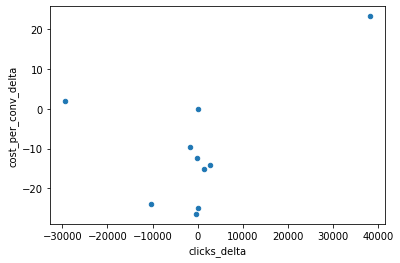

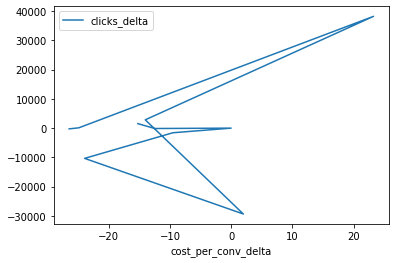

In [23]:
new.plot(x="cost_per_conv_delta", y="clicks_delta", kind = "bar")
new.plot(y="cost_per_conv_delta", x="clicks_delta", kind = "scatter")
new.plot(x="cost_per_conv_delta", y="clicks_delta", kind = "line")

# new.plot(x="cost_per_conv_delta", y="impression_share", kind = "scatter")
# new.plot(x="cost_per_conv_delta", y="conversions", kind = "scatter")

<AxesSubplot:xlabel='cost_per_conv_delta'>

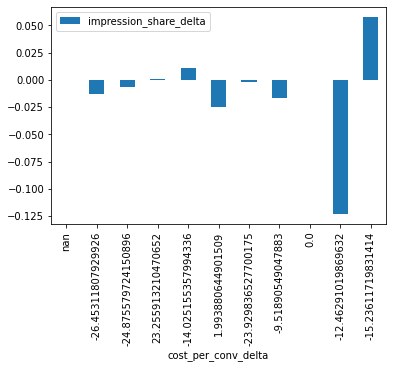

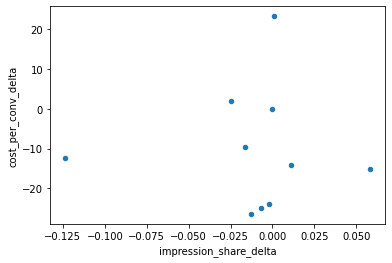

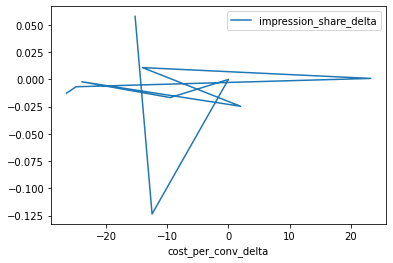

In [24]:
new.plot(x="cost_per_conv_delta", y="impression_share_delta", kind = "bar")
new.plot(y="cost_per_conv_delta", x="impression_share_delta", kind = "scatter")
new.plot(x="cost_per_conv_delta", y="impression_share_delta", kind = "line")

<AxesSubplot:xlabel='cost_per_conv_delta'>

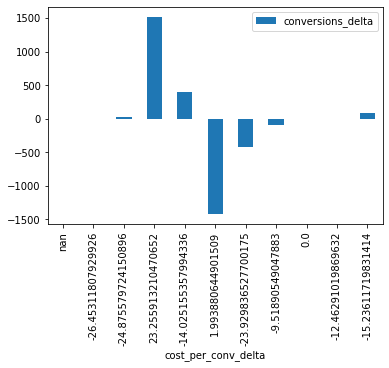

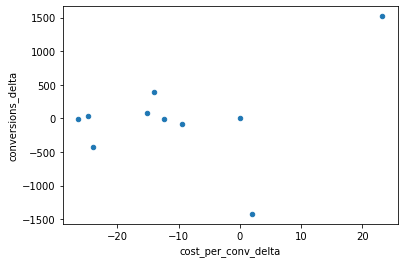

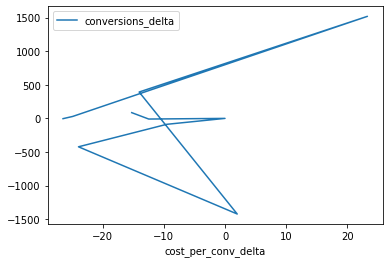

In [25]:
new.plot(x="cost_per_conv_delta", y="conversions_delta", kind = "bar")
new.plot(x="cost_per_conv_delta", y="conversions_delta", kind = "scatter")
new.plot(x="cost_per_conv_delta", y="conversions_delta", kind = "line")

In [38]:
# data = data1[data1["final"] == 70]
data1

,date,campaign_id,ad_group_id,keyword_id,keyword,Match type,Bidding strategy type,Ad group name_x,Campaign name_x,impressions,...,Search rank lost impression share,Lost impressions,Absolute top impression percentage,Lost impressions due to rank,Estimated total conversion rate,initial,final,level,Campaign name_y,Ad group name_y
0,22-01-01,10712349001,104499295183,38026285494,hellofresh meal,Exact,Target CPA,Meals,US-S[01]: Prospecting | Brand | Meals - Exact,5,...,0.00,0,0.80,0,1.33,NaN,NaN,NaN,NaN,NaN
1,22-01-01,10712349001,104499295183,38825879769,hello fresh meal,Exact,Target CPA,Meals,US-S[01]: Prospecting | Brand | Meals - Exact,19,...,0.05,1,0.72,1,0.00,NaN,NaN,NaN,NaN,NaN
2,22-01-01,10712349001,104499295183,57112105614,hello fresh meals,Phrase,Target CPA,Meals,US-S[01]: Prospecting | Brand | Meals - Exact,41,...,0.73,105,0.42,105,1.11,NaN,NaN,NaN,NaN,NaN
3,22-01-01,10712349001,104499295183,57112112094,hello fresh meals,Exact,Target CPA,Meals,US-S[01]: Prospecting | Brand | Meals - Exact,2967,...,0.06,185,0.53,185,0.70,NaN,NaN,NaN,NaN,NaN
4,22-01-01,10712349001,104499295183,57112114014,hellofresh meals,Exact,Target CPA,Meals,US-S[01]: Prospecting | Brand | Meals - Exact,115,...,0.09,12,0.52,12,0.39,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,22-07-06,10712349001,104499295183,429776484854,meal kit hellofresh,Exact,Target CPA,Meals,US-S[01]: Prospecting | Brand | Meals - Exact,1,...,NaN,0,1.00,0,NaN,NaN,126.0,NaN,NaN,NaN
3537,22-07-06,10712349001,104499295183,430543157464,meal kits hello fresh,Exact,Target CPA,Meals,US-S[01]: Prospecting | Brand | Meals - Exact,1,...,NaN,0,0.00,0,NaN,NaN,126.0,NaN,NaN,NaN
3538,22-07-06,10712349001,104499295183,430543157704,meal plans hello fresh,Exact,Target CPA,Meals,US-S[01]: Prospecting | Brand | Meals - Exact,1,...,NaN,0,1.00,0,0.00,NaN,126.0,NaN,NaN,NaN
3539,22-07-06,10712349001,104499295183,430602999045,meals hellofresh,Exact,Target CPA,Meals,US-S[01]: Prospecting | Brand | Meals - Exact,1,...,NaN,0,1.00,0,0.00,NaN,126.0,NaN,NaN,NaN


In [41]:
#find top ad_groups basis spends
analysis = data.groupby(['ad_group_id'])['cost'].sum().reset_index().sort_values('cost',ascending=False,ignore_index = True)
analysis["Cost_cumsum"] = analysis["cost"].cumsum()
analysis["cost_share"] = analysis["cost"].cumsum()/analysis['cost'].sum()

In [42]:
analysis

,ad_group_id,cost,Cost_cumsum,cost_share


In [29]:
#take top 10 adgroups
top_adgroups = analysis[:10]['ad_group_id'].values
print(top_adgroups)

[]


In [30]:
df = data[data['ad_group_id'].isin(top_adgroups)].copy()
df

,date,campaign_id,ad_group_id,keyword_id,keyword,Match type,Bidding strategy type,Ad group name_x,Campaign name_x,impressions,...,Search rank lost impression share,Lost impressions,Absolute top impression percentage,Lost impressions due to rank,Estimated total conversion rate,initial,final,level,Campaign name_y,Ad group name_y


In [31]:
#no of keywords in those adgroups
df.groupby('ad_group_id')['keyword_id'].nunique()

Series([], Name: keyword_id, dtype: int64)

In [32]:
analysis = df.groupby('ad_group_id')[['final','cost','conversions','impression_share']].agg({'final':'mean','cost':'sum','conversions':'sum','impression_share':'mean'})
analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']

In [33]:
analysis

,final,cost,conversions,impression_share,cost_per_conv
ad_group_id,,,,,


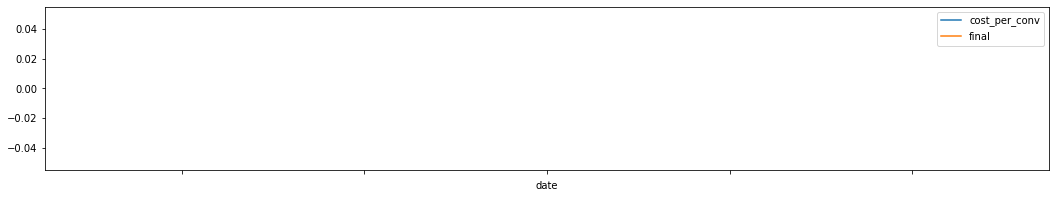

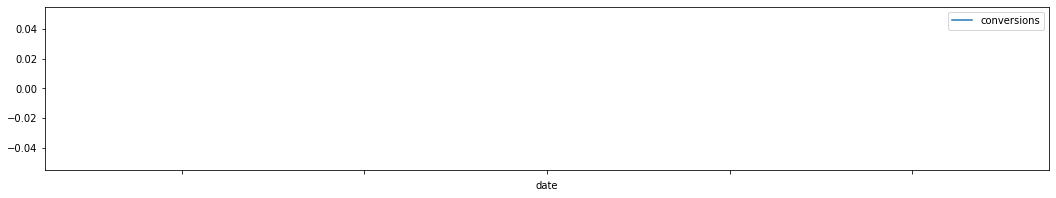

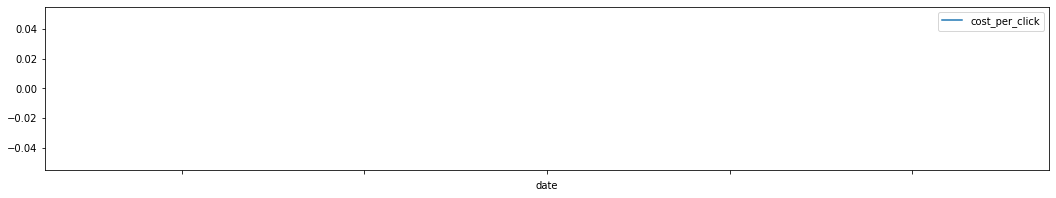

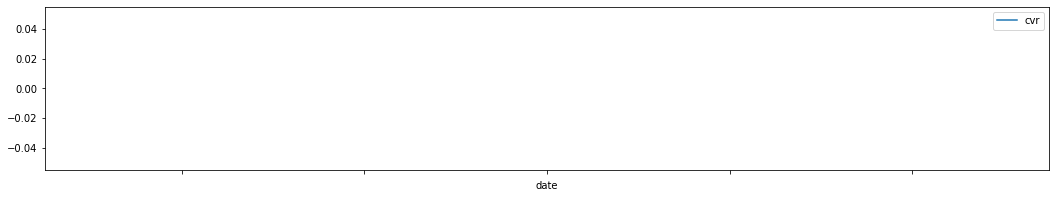

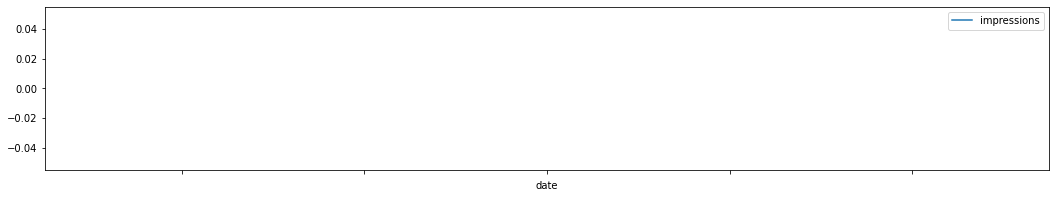

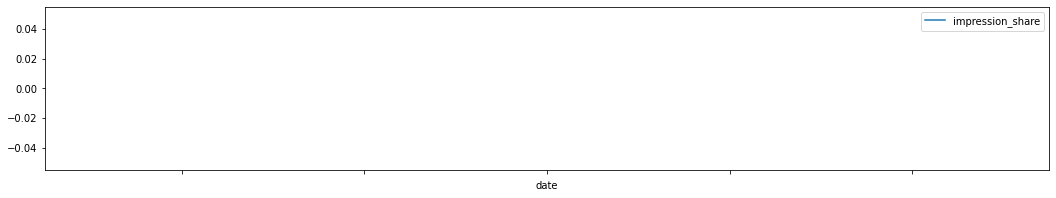

In [43]:
ad_group_id = 104499295183
analysis = df.groupby(['date','ad_group_id'])[['cost','conversions','final','clicks','impressions','impression_share']].agg({'cost':'sum','conversions':'sum','final':'mean','clicks':'sum','impressions':'sum','impression_share':'mean'}).reset_index()
# print(analysis)
analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']
analysis['cost_per_click'] = analysis['cost']/analysis['clicks']
analysis['cvr'] = analysis['conversions']/analysis['clicks']
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='cost_per_conv',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='final',figsize=(18,3),ax=ax)
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='conversions',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='cost_per_click',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='cvr',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='impressions',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='impression_share',figsize=(18,3))

# analysis for some time date for differnt tcpa 

In [47]:
# data1["final"]

analysis = data1.groupby(['date','ad_group_id'])[['cost','conversions','final','clicks','impressions','impression_share']].agg({'cost':'sum','conversions':'sum','final':'mean','clicks':'sum','impressions':'sum','impression_share':'mean'}).reset_index()
analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']

In [48]:
tcpa['final']



0     126.0
1     120.0
3     111.0
4     107.0
11     99.0
15     93.0
16     85.0
17     83.0
18     75.0
19     55.0
20     51.0
Name: final, dtype: float64

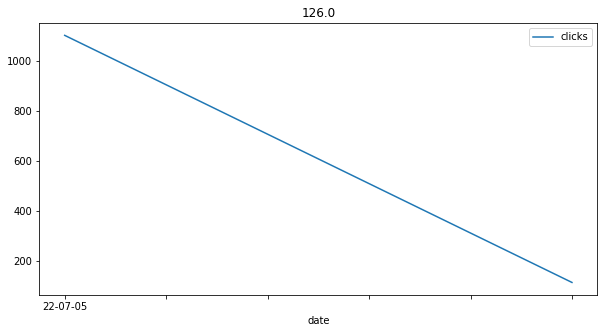

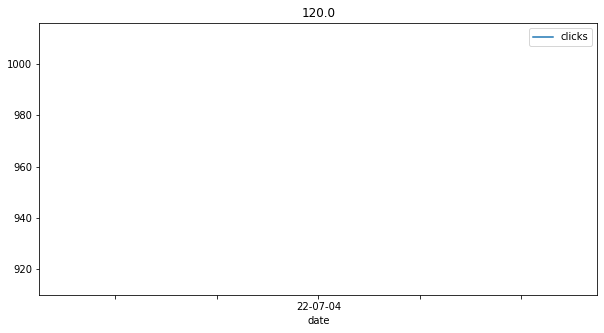

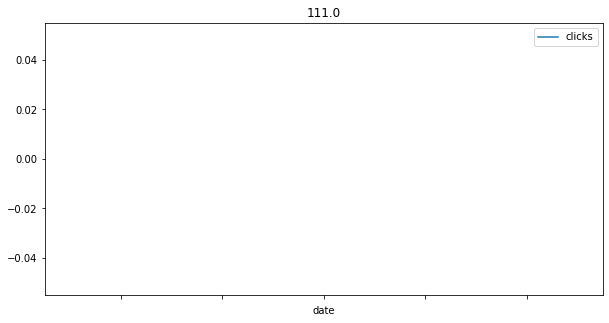

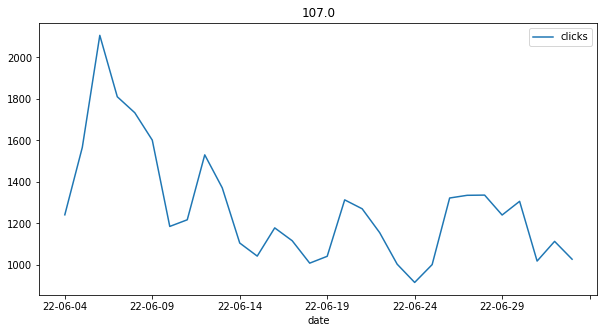

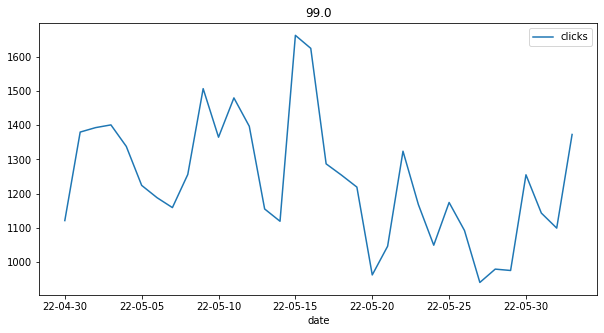

In [49]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
        analysis[analysis["final"]==i].plot(x= "date", y= "clicks", kind = "line",figsize=(10,5),title = i)


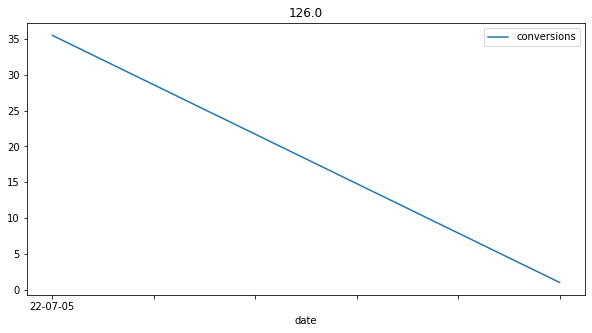

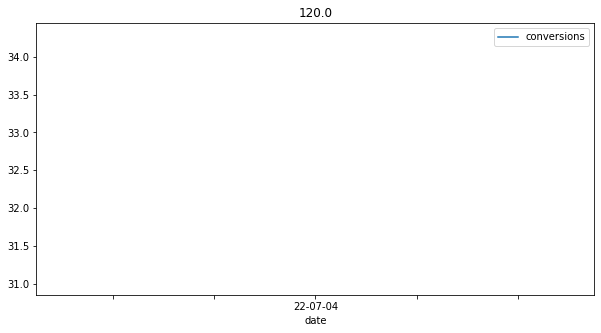

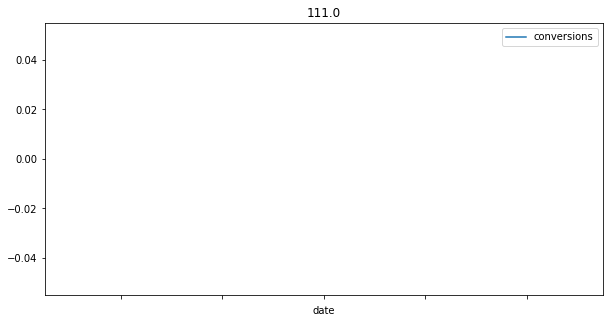

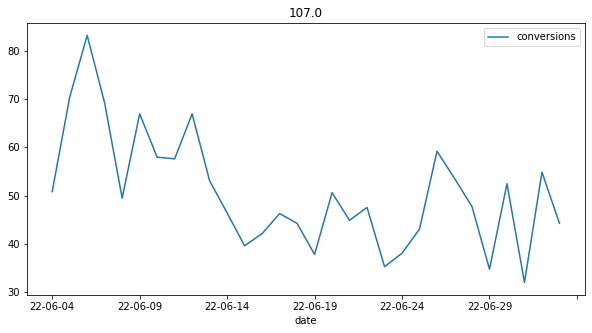

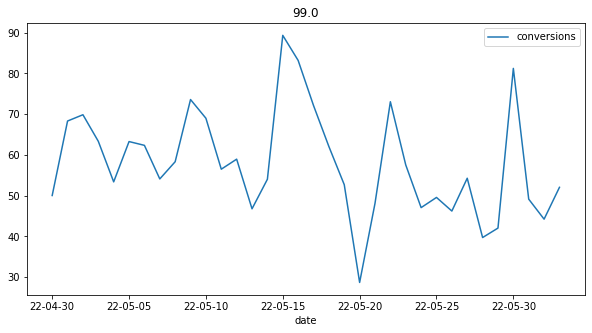

In [50]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
        analysis[analysis["final"]==i].plot(x= "date", y= "conversions", kind = "line",figsize=(10,5),title = i)

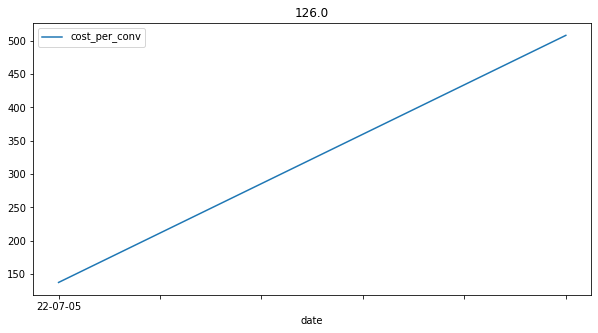

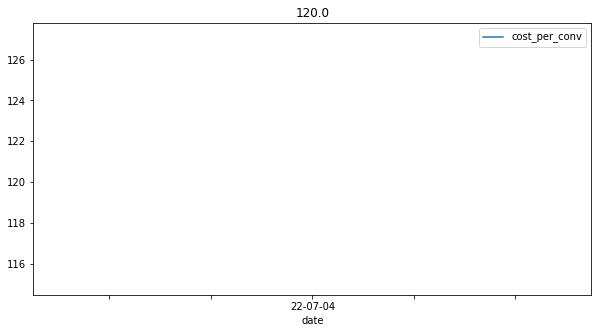

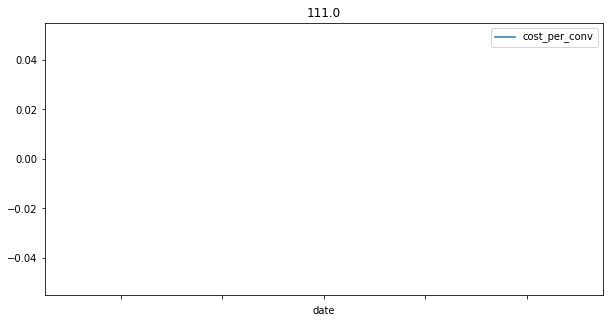

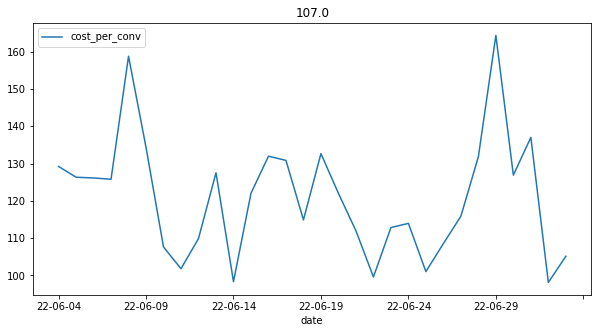

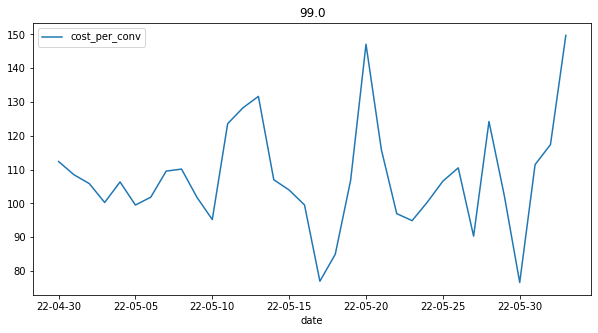

In [51]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
        analysis[analysis["final"]==i].plot(x= "date", y= "cost_per_conv", kind = "line",figsize=(10,5),title = i)

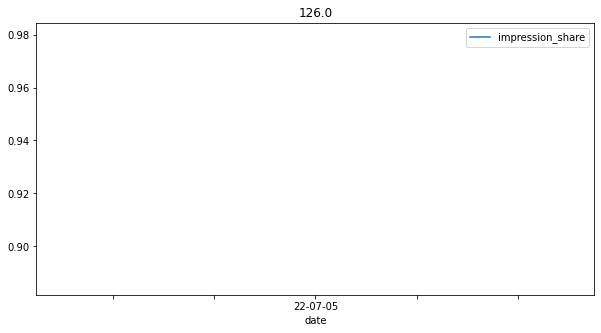

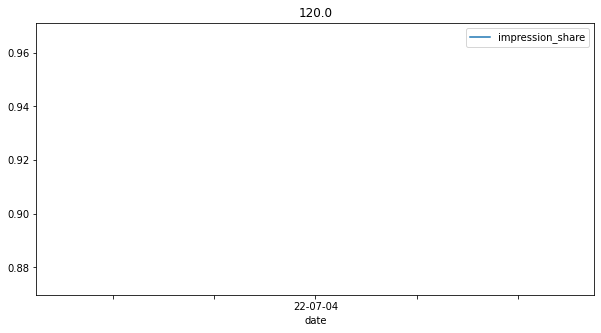

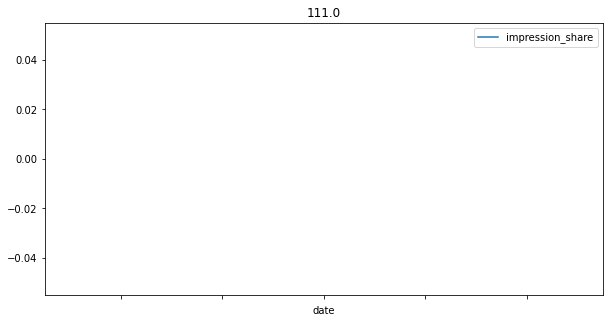

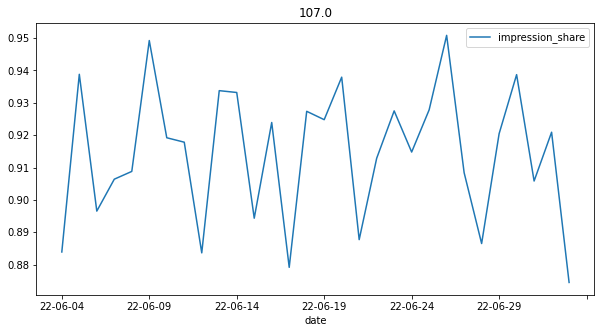

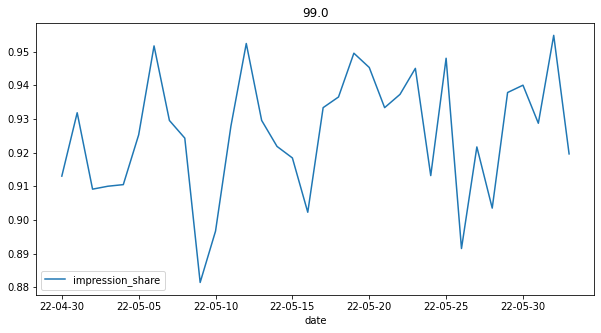

In [52]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
        analysis[analysis["final"]==i].plot(x= "date", y= "impression_share", kind = "line",figsize=(10,5),title = i)

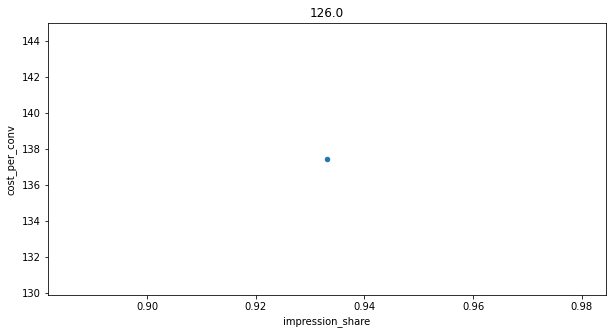

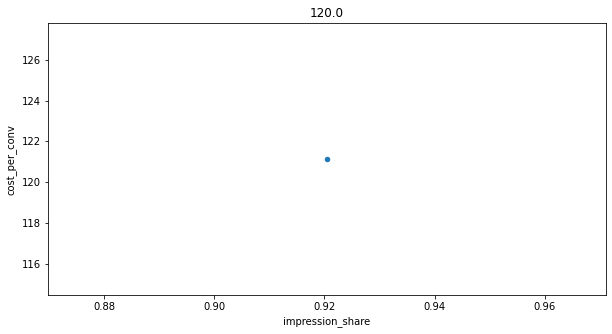

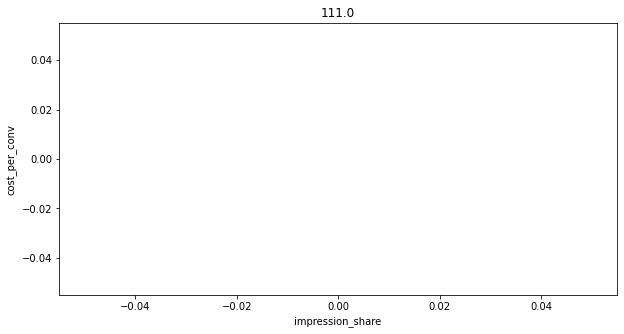

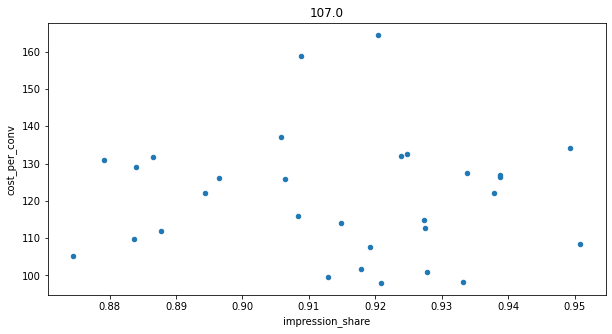

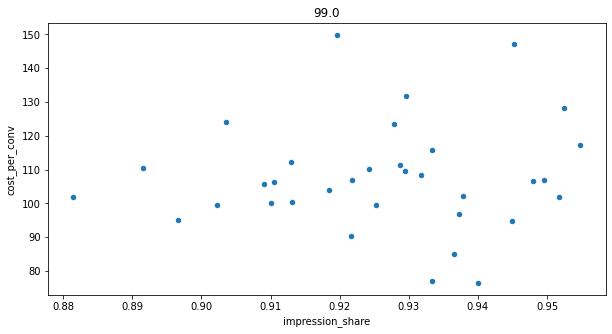

In [53]:
count = 0
for i in tcpa['final']:
    count = count +1
    if count <=5:
        analysis[analysis["final"]==i].plot(y= "cost_per_conv", x= "impression_share", kind = "scatter",figsize=(10,5),title = i)

<AxesSubplot:xlabel='impression_share', ylabel='cost_per_conv'>

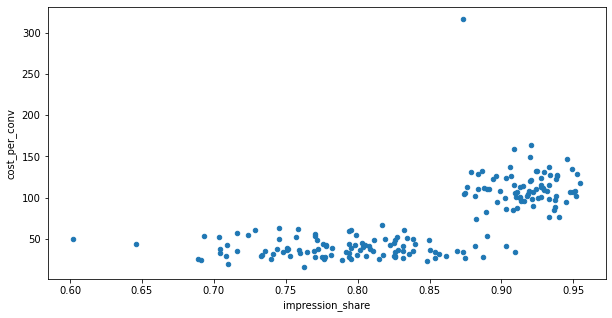

In [54]:
 analysis.plot(y= "cost_per_conv", x= "impression_share", kind = "scatter",figsize=(10,5))

<AxesSubplot:xlabel='clicks', ylabel='cost_per_conv'>

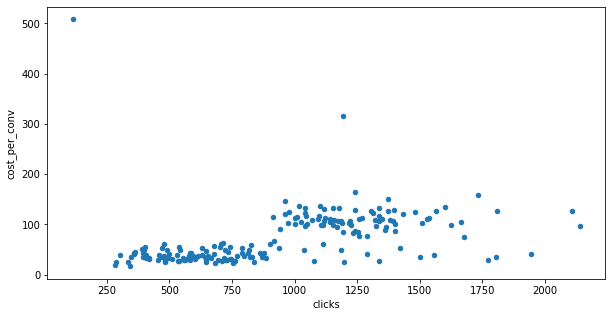

In [55]:
 analysis.plot(y= "cost_per_conv", x= "clicks", kind = "scatter",figsize=(10,5))

<AxesSubplot:xlabel='conversions', ylabel='cost_per_conv'>

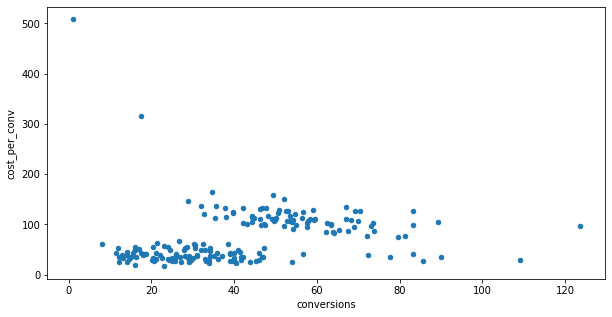

In [56]:
 analysis.plot(y= "cost_per_conv", x= "conversions", kind = "scatter",figsize=(10,5))

<AxesSubplot:xlabel='final', ylabel='cost_per_conv'>

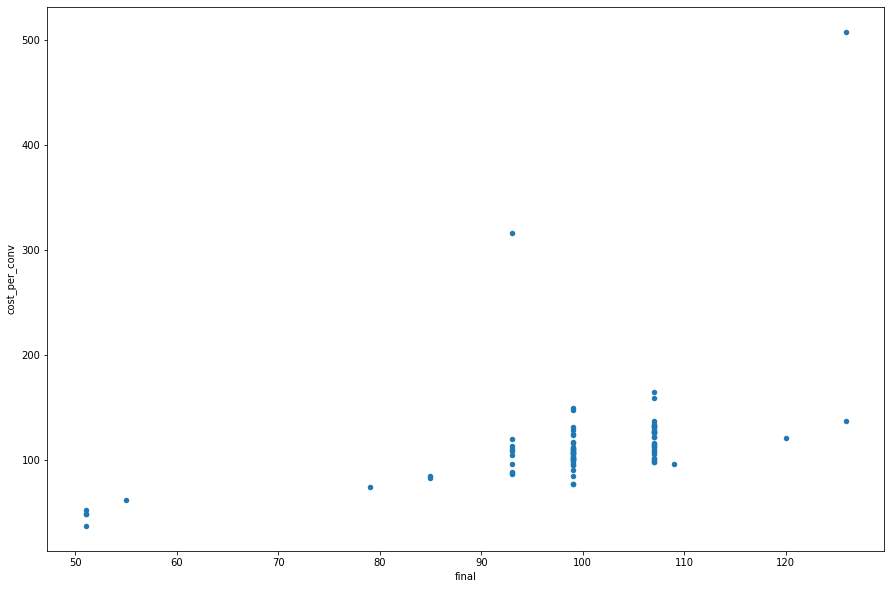

In [57]:
 analysis.plot(y= "cost_per_conv", x= "final", kind = "scatter",figsize=(15,10))

        date   ad_group_id     cost  conversions  final  clicks  impressions  \
0   22-02-15  104499295183   484.00         8.00   70.0     477         1451   
1   22-02-16  104499295183   439.26        14.50   70.0     420         1392   
2   22-02-17  104499295183   436.53        13.06   70.0     407         1267   
3   22-02-18  104499295183   302.19        16.00   70.0     282          999   
4   22-02-19  104499295183   371.21        23.00   70.0     341         1231   
5   22-02-20  104499295183   310.45        12.04   70.0     288         1175   
6   22-02-21  104499295183   682.72        27.04   70.0     484         1740   
7   22-02-22  104499295183  1070.83        39.00   70.0     759         2659   
8   22-02-23  104499295183   958.52        40.46   70.0     754         2719   
9   22-02-24  104499295183   900.95        26.04   70.0     604         2361   
10  22-02-25  104499295183   951.18        26.04   70.0     576         2059   
11  22-02-26  104499295183  1188.59     

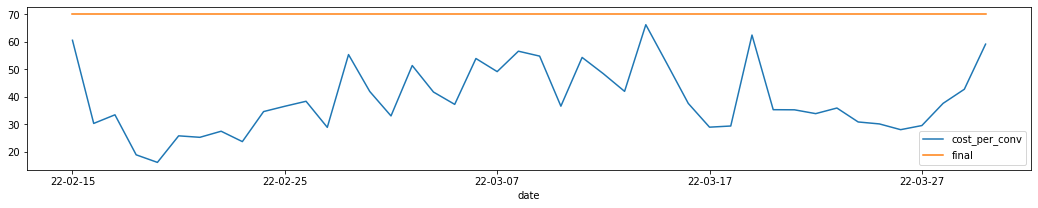

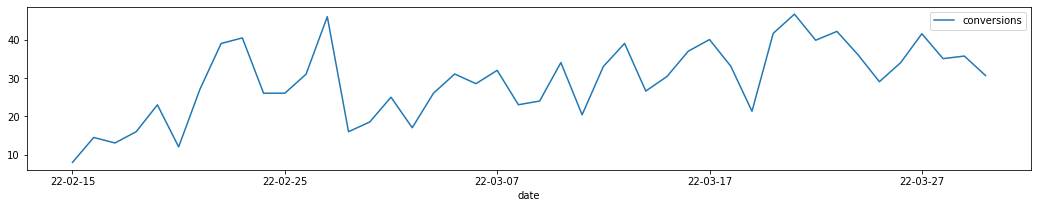

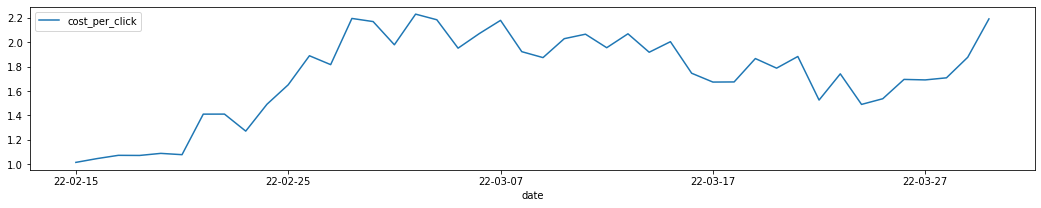

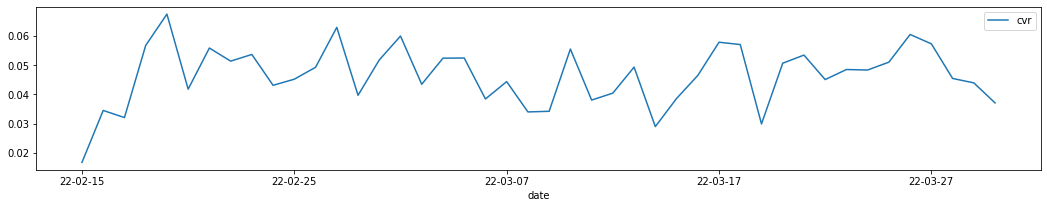

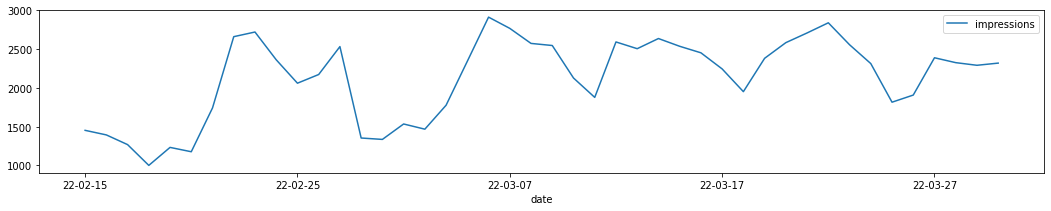

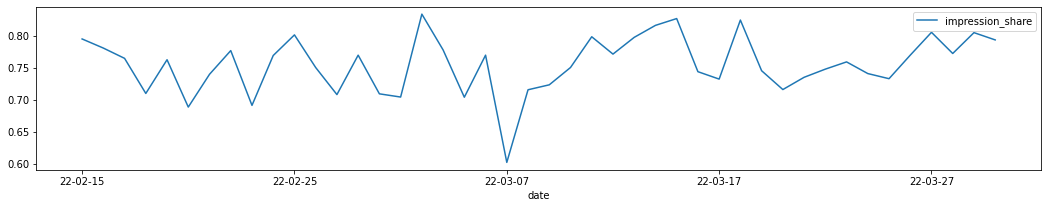

In [90]:
ad_group_id = 104499295183
analysis = df.groupby(['date','ad_group_id'])[['cost','conversions','final','clicks','impressions','impression_share']].agg({'cost':'sum','conversions':'sum','final':'mean','clicks':'sum','impressions':'sum','impression_share':'mean'}).reset_index()
print(analysis)
analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']
analysis['cost_per_click'] = analysis['cost']/analysis['clicks']
analysis['cvr'] = analysis['conversions']/analysis['clicks']
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='cost_per_conv',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='final',figsize=(18,3),ax=ax)
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='conversions',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='cost_per_click',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='cvr',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='impressions',figsize=(18,3))
ax = analysis[analysis['ad_group_id'] == ad_group_id].plot(x='date',y='impression_share',figsize=(18,3))

In [58]:
df[df['ad_group_id'] == ad_group_id]['keyword'].unique()

array(['hellofresh meal', 'hello fresh meal', 'hello fresh meals',
       'hellofresh meals', 'hello fresh meal options',
       'hello fresh meals cost', 'hello fresh meal kit',
       'hello fresh meal plan', 'hello fresh meal kits',
       'hellofresh meal cost', 'hello fresh meal plans',
       'meal kit hello fresh', 'meals hellofresh',
       'hellofresh meal kit cost', 'hellofresh meal prep',
       'hello fresh meal cost', 'meal plans hellofresh',
       'hellofresh meal plans cost', 'hello fresh meal subscription',
       'average cost of hellofresh meals', 'meal kits hello fresh',
       'hello fresh meal deal', 'meal plans hello fresh',
       'hellofresh meal boxes', 'hello fresh meal deals',
       'hellofresh meal price', 'meal kit hellofresh',
       'meal kits hellofresh'], dtype=object)